<a href="https://colab.research.google.com/github/bluebynick/CEE-9730-Data-Science-for-Geotechnical-Engineers/blob/main/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Files exist?
75kpa.xlsx True
150 kpa.xlsx True
final idk.xlsx True
idk.xlsx True
Train: (20432, 6) Val: (5108, 6) Test: (1428, 6)
Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3899 - loss: 2025.8796 - val_accuracy: 0.5847 - val_loss: 269.7530
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4071 - loss: 855.6265 - val_accuracy: 0.3362 - val_loss: 796.7125
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4426 - loss: 787.7844 - val_accuracy: 0.3708 - val_loss: 312.8091
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4673 - loss: 566.7244 - val_accuracy: 0.3192 - val_loss: 540.8331
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4866 - loss: 600.9269 - val_accuracy: 0.6634 - val_loss: 215.9580
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5641 - loss: 365.1992 - val_accuracy: 0.6665 - val_loss: 152.8148
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/ste

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


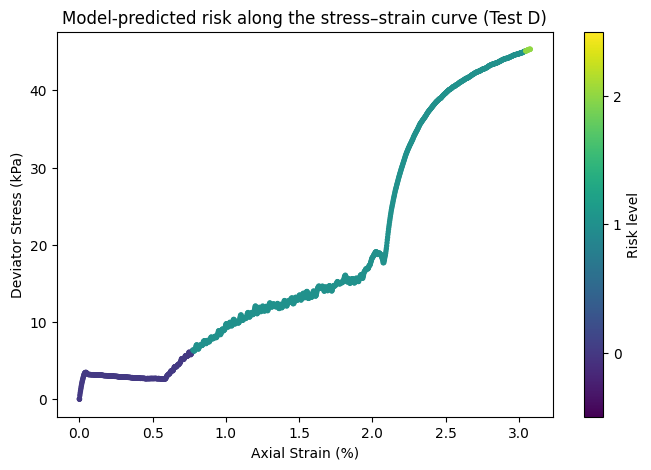

Validation performance:
              precision    recall  f1-score   support

         low       0.78      0.99      0.87      2735
    moderate       0.51      0.49      0.50      1180
        high       1.00      0.39      0.57      1193

    accuracy                           0.74      5108
   macro avg       0.76      0.63      0.65      5108
weighted avg       0.77      0.74      0.72      5108

[[2719   16    0]
 [ 598  582    0]
 [ 178  545  470]]
Test D performance:
              precision    recall  f1-score   support

         low       1.00      0.26      0.41      1391
    moderate       0.02      0.57      0.04        37
        high       0.00      0.00      0.00         0

    accuracy                           0.27      1428
   macro avg       0.34      0.28      0.15      1428
weighted avg       0.97      0.27      0.40      1428

[[ 362 1029    0]
 [   0   21   16]
 [   0    0    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#variables
BATCH_SIZE = 64;
EPOCHS = 20;
N_CLASSES = 3;
histories = {}
LOW_THRESHOLD = 3.0
HIGH_THRESHOLD = 10.0
SHEAR_SHEET_NAME = "1|4|1"   # shear stage sheet name in your Excel

#get the files. i'd tried with zip files but it ended horribly so i restarted lol
testA = os.path.join("/content/drive/MyDrive/Master's/Nick/75kpa", "75kpa.xlsx")
testB = os.path.join("/content/drive/MyDrive/Master's/Nick/150kpa - f", "150 kpa.xlsx")
testC = os.path.join("/content/drive/MyDrive/Master's/Nick/test 3", "final idk.xlsx")
testD = os.path.join("/content/drive/MyDrive/Master's/Nick/test 4", "idk.xlsx")

print("did the files load ok?")
for f in [testA, testB, testC, testD]:
    print(os.path.basename(f), os.path.exists(f))

#the loading method
def load_shear_data(path, test_label):
    """ #OMG MULTILINE COMMENTS HOLY F
    path: path to Excel file
    test_label: "A", "B", "C", or "D"
    returns: DataFrame with features + axial strain
    """
    raw = pd.read_excel(path, sheet_name=SHEAR_SHEET_NAME) #get the data

    #find the data's location
    mask = raw.apply(lambda row: row.astype(str).str.contains("Deviator Stress", case=False, na=False).any(), axis=1) #find the header row where "Deviator Stress" appears
    header_row = raw[mask].index[-1]  # last occurrence

    #get the size of what we filtered above
    header = raw.iloc[header_row].tolist()
    header = [h if isinstance(h, str) and h == h else f"col_{i}"
              for i, h in enumerate(header)] #make sure it has columns

    #build a 2D dataset with iloc from the 2 up location of the one up size
    data = raw.iloc[header_row+1:].reset_index(drop=True)
    data.columns = header

    # keep the columns we care about
    cols = [
        "Time",
        "Corrected Deviator Stress",
        "Axial Strain",
        "Volumetric Strain",
        "Minor Effective Stress",
        "Major Effective Stress",
        "Effective Stress Ratio",
        "Effective Normal Stress",
    ]
    cols = [c for c in cols if c in data.columns]  # handle missing extras
    data = data[cols].copy()

    data["Test"] = test_label
    return data

def batch_gen(X, y, batch_size=BATCH_SIZE):
    n = X.shape[0]
    i = 0
    while True:
        idx = np.arange(i, i + batch_size) % n
        batch_x = X[idx]
        batch_y = y[idx]
        i += batch_size
        yield batch_x, batch_y


def build_unet(input_shape, num_classes=N_CLASSES):
    """
    Small MLP classifier. Keeping the name 'build_unet' so the rest
    of the training loop doesn't need to change.
    """
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

# 2. Make a risk label from Axial Strain
def strain_to_risk(ea):
    ea = float(ea)
    if ea < LOW_THRESHOLD:
        return 0   # low
    elif ea < HIGH_THRESHOLD:
        return 1   # moderate
    else:
        return 2   # high

#let's run this bad boy
#pass the different folders we have to the pairing method. idk if i should pass test / train_extra too tho
# 1. Load four tests into one DataFrame
df_A = load_shear_data(testA, "A")
df_B = load_shear_data(testB, "B")
df_C = load_shear_data(testC, "C")
df_D = load_shear_data(testD, "D")

dfs = [df_A, df_B, df_C, df_D]

for df in dfs:
    df["risk"] = pd.to_numeric(df["Axial Strain"], errors="coerce").apply(strain_to_risk)

all_df = pd.concat(dfs, ignore_index=True)

# 3. Train/val = A,B,C ; Test = D
train_df = all_df[all_df["Test"].isin(["D","B","C"])].copy()
test_df  = all_df[all_df["Test"] == "A"].copy()

feature_cols = [c for c in train_df.columns if c not in ["Axial Strain", "Volumetric Strain", "risk", "Test"]]

X = train_df[feature_cols].to_numpy().astype("float32")
y = train_df["risk"].to_numpy().astype("int32")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

X_test = test_df[feature_cols].to_numpy().astype("float32")
y_test = test_df["risk"].to_numpy().astype("int32")

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

# 4. Generators
train_gen = batch_gen(X_train, y_train, BATCH_SIZE)
val_gen   = batch_gen(X_val, y_val, BATCH_SIZE)

steps_per_epoch = len(X_train) // BATCH_SIZE
val_steps       = max(1, len(X_val) // BATCH_SIZE)


"""

#pass the # of classes to build the model, for each each training rate
for lr in [1e-2, 1e-3, 1e-4]:
    print("Training with lr =", lr)
    model = build_unet(input_shape=(X_train.shape[1],), num_classes=N_CLASSES)
    opt = tf.keras.optimizers.Adam(lr)
    model.compile(
        optimizer=opt,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    h = model.fit(
        train_gen,
        validation_data=val_gen,
        steps_per_epoch=steps_per_epoch,
        validation_steps=val_steps,
        epochs=EPOCHS,
        verbose=1
    )
    histories[lr] = h.history

#plot the training and validation loss curve at each learning rate
plt.figure(figsize=(10,6))
for lr, hist in histories.items():
    plt.plot(hist['loss'], label=f"train lr={lr}")
    plt.plot(hist['val_loss'], '--', label=f"val lr={lr}")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss per learning rate"); plt.legend(); plt.grid(True); plt.figure(figsize=(10,6))
plt.show()

for lr, hist in histories.items():
    plt.plot(hist['loss'], label=f"train lr={lr}")
    plt.plot(hist['val_loss'], '--', label=f"val lr={lr}")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss per learning rate"); plt.legend(); plt.grid(True)
plt.show()

"""


#some of these arguments are Fked
#How to actually test it (numbers time)
# 1. Train one "final" model at the best LR
best_lr = 1e-3  # or whichever looked best in your loss plot
model = build_unet(input_shape=(X_train.shape[1],), num_classes=N_CLASSES)
opt = tf.keras.optimizers.Adam(best_lr)
model.compile( optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(
    batch_gen(X_train, y_train, BATCH_SIZE),
    validation_data=batch_gen(X_val, y_val, BATCH_SIZE),
    steps_per_epoch=len(X_train)//BATCH_SIZE,
    validation_steps=max(1, len(X_val)//BATCH_SIZE),
    epochs=EPOCHS,
    verbose=1
)

#wtf is that line ^^^


# validation set
val_probs = model.predict(X_val)
val_pred = np.argmax(val_probs, axis=1)

print("Validation performance:")
print(classification_report(y_val, val_pred, target_names=["low", "moderate", "high"]))
print("Confusion matrix (val):")
print(confusion_matrix(y_val, val_pred))

# test set (this is your "unknown" Test D)
test_probs = model.predict(X_test)
test_pred = np.argmax(test_probs, axis=1)

print("\nTest performance on weird Test D:")
print(classification_report(y_test, test_pred,target_names=["low", "moderate", "high"],labels=[0, 1, 2]))
print("Confusion matrix (test):")
print(confusion_matrix(y_test, test_pred, labels=[0, 1, 2]))



#A visual “proof” that feels satisfying
# and feature_cols / X_test / y_test defined like before

test_probs = model.predict(X_test)
test_pred = np.argmax(test_probs, axis=1)  # 0=low,1=mod,2=high

axial_strain = test_df["Axial Strain"].to_numpy().astype(float)
deviator_stress = test_df["Corrected Deviator Stress"].to_numpy().astype(float)

plt.figure(figsize=(8,5))
scatter = plt.scatter(axial_strain, deviator_stress, c=test_pred, cmap="viridis", s=8)
plt.xlabel("Axial Strain (%)")
plt.ylabel("Deviator Stress (kPa)")
plt.title("Model-predicted risk along the stress–strain curve (Test D)")
plt.colorbar(scatter, ticks=[0,1,2], label="Risk level")
plt.clim(-0.5, 2.5)
plt.show()


#numbers
print("Validation performance:")
print(classification_report(y_val, val_pred, target_names=["low","moderate","high"]))
print(confusion_matrix(y_val, val_pred))

print("Test D performance:")
print(classification_report(y_test, test_pred, target_names=["low","moderate","high"], labels=[0, 1, 2]))
print(confusion_matrix(y_test, test_pred, labels=[0, 1, 2]))